In [1]:
import flowmap.formats.ugrid
from tvtk.api import tvtk
import geojson
import matplotlib.pyplot as plt
import numpy as np
import shapely.geometry
from tvtk.common import configure_input, configure_source_data
import networkx
import rasterio.mask
import geojson
import flowmap.subgrid
import netCDF4
import tqdm
import pandas as pd


%matplotlib inline

In [2]:
grid = flowmap.formats.ugrid.UGrid(path='/Users/baart_f/data/rijnland/vanGovert/Groesbeek/groesbeek_map.nc', src_epsg=28992)
dem = flowmap.dem.read_dem('/Users/baart_f/data/rijnland/vanGovert/Groesbeek/aw_ahn_d_asc.tiff')
crs = geojson.crs.Named(properties={"name": "urn:ogc:def:crs:EPSG::{:d}".format(grid.src_epsg)})

In [3]:
is_grid = grid.build_is_grid(dem)
ugrid = grid.ugrid

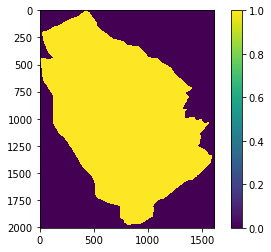

In [4]:
plt.imshow(is_grid[::10, ::10])
plt.colorbar()

In [5]:
flowmap.subgrid.create_export('test.nc', 2000, 20)

In [6]:
!ncdump -h test.nc

netcdf test {
dimensions:
	cells = 2000 ;
	bins = 20 ;
	bin_edges = 21 ;
	two_times_two = 4 ;
variables:
	double bin_edges(cells, bin_edges) ;
		bin_edges:long_name = "bin edges of topography histogram" ;
	double cum_volume_table(cells, bins) ;
		cum_volume_table:long_name = "cumulative volume table" ;
	double volume_table(cells, bins) ;
		volume_table:long_name = "volume table" ;
	double extent(cells, two_times_two) ;
		extent:long_name = "extent (left, right, lower, upper)" ;
	int64 n_per_bin(cells, bins) ;
		n_per_bin:long_name = "topography histogram" ;
	int64 slice(cells, two_times_two) ;
		slice:long_name = "slice (row start, stop, colum start stop)" ;
}


In [7]:
tables = flowmap.subgrid.build_tables(ugrid, dem)


table rows:   0%|          | 931/2672257 [00:01<58:20, 763.20it/s]  


In [8]:
flowmap.subgrid.export('test.nc', tables)

100%|██████████| 1002/1002 [00:01<00:00, 874.21it/s]


In [9]:
tables

,bin_edges,cum_volume_table,extent,face,n_per_bin,slice,volume_table
id,,,,,,,
0,"[21.4505500793, 21.4872535706, 21.5239570618, ...","[0.00917587280273, 0.0367034912109, 0.11011047...","[196293.156, 196301.156, 419582.898693, 419590...","[[196293.156, 419582.898693], [196301.156, 419...","[1, 2, 5, 3, 0, 3, 3, 1, 1, 3, 1, 4, 8, 6, 16,...","(slice(14803, 14819, None), slice(14948, 14964...","[0.00917587280273, 0.0275276184082, 0.07340698..."
1,"[21.7633895874, 21.7987195969, 21.8340496063, ...","[0.00883250236511, 0.0264975070953, 0.07066001...","[196285.156, 196293.156, 419574.898693, 419582...","[[196285.156, 419574.898693], [196293.156, 419...","[1, 1, 3, 0, 0, 0, 2, 1, 2, 2, 6, 6, 25, 34, 4...","(slice(14819, 14835, None), slice(14932, 14948...","[0.00883250236511, 0.0176650047302, 0.04416251..."
2,"[22.1952590942, 22.2245146751, 22.253770256, 2...","[0.00731389522552, 0.014627790451, 0.021941685...","[196277.156, 196285.156, 419566.898693, 419574...","[[196277.156, 419566.898693], [196285.156, 419...","[1, 0, 0, 0, 2, 0, 0, 1, 2, 10, 21, 22, 37, 34...","(slice(14835, 14851, None), slice(14916, 14932...","[0.00731389522552, 0.00731389522552, 0.0073138..."
3,"[22.6029891968, 22.6252487183, 22.6475082397, ...","[0.00556488037109, 0.0111297607422, 0.01669464...","[196269.156, 196277.156, 419558.898693, 419566...","[[196269.156, 419558.898693], [196277.156, 419...","[1, 0, 0, 0, 0, 0, 1, 7, 13, 21, 21, 24, 20, 2...","(slice(14851, 14867, None), slice(14900, 14916...","[0.00556488037109, 0.00556488037109, 0.0055648..."
4,"[22.9500007629, 22.9723506927, 22.9947006226, ...","[0.00558748245239, 0.0167624473572, 0.02793741...","[196261.156, 196269.156, 419550.898693, 419558...","[[196261.156, 419550.898693], [196269.156, 419...","[1, 1, 0, 1, 2, 2, 17, 14, 25, 22, 23, 30, 26,...","(slice(14867, 14883, None), slice(14884, 14900...","[0.00558748245239, 0.0111749649048, 0.01117496..."
5,"[21.2329902649, 21.2704017639, 21.3078132629, ...","[0.0374114990234, 0.252527618408, 0.8604644775...","[196293.156, 196301.156, 419590.898693, 419598...","[[196293.156, 419590.898693], [196301.156, 419...","[4, 19, 42, 40, 35, 28, 25, 12, 4, 1, 5, 2, 3,...","(slice(14787, 14803, None), slice(14948, 14964...","[0.0374114990234, 0.215116119385, 0.6079368591..."
6,"[21.4825706482, 21.5181325912, 21.5536945343, ...","[0.0800143718719, 0.417852830887, 0.9512819767...","[196285.156, 196293.156, 419582.898693, 419590...","[[196285.156, 419582.898693], [196293.156, 419...","[9, 29, 22, 36, 23, 19, 14, 18, 12, 6, 7, 1, 4...","(slice(14803, 14819, None), slice(14932, 14948...","[0.0800143718719, 0.337838459015, 0.5334291458..."
7,"[21.7773799896, 21.8135080338, 21.8496360779, ...","[0.0541920661926, 0.225800275803, 0.6051447391...","[196277.156, 196285.156, 419574.898693, 419582...","[[196277.156, 419574.898693], [196285.156, 419...","[6, 13, 23, 28, 23, 18, 16, 14, 16, 9, 3, 6, 1...","(slice(14819, 14835, None), slice(14916, 14932...","[0.0541920661926, 0.17160820961, 0.37934446334..."
8,"[22.0400009155, 22.078100872, 22.1162008286, 2...","[0.0380999565125, 0.219074749947, 0.5333993911...","[196269.156, 196277.156, 419566.898693, 419574...","[[196269.156, 419566.898693], [196277.156, 419...","[4, 15, 14, 25, 25, 20, 17, 11, 5, 7, 5, 6, 6,...","(slice(14835, 14851, None), slice(14900, 14916...","[0.0380999565125, 0.180974793434, 0.3143246412..."


In [10]:
with netCDF4.Dataset('test.nc') as ds:
    vars = {}
    index = np.arange(ds.variables['bin_edges'].shape[0])
    for var in ['bin_edges', 'cum_volume_table', 'volume_table', 'extent', 'n_per_bin']:
        vars[var] = list(ds.variables[var][:])
    s = ds.variables['slice'][:]
    fun = lambda x: (slice(x[0], x[1]), slice(x[2], x[3]))
    vars['slice'] = list(np.ma.apply_along_axis(
        fun, 
        1, 
        s
    ))
    table = pd.DataFrame(vars, index=index)

In [11]:
tables.iloc[0]

bin_edges           [21.4505500793, 21.4872535706, 21.5239570618, ...
cum_volume_table    [0.00917587280273, 0.0367034912109, 0.11011047...
extent              [196293.156, 196301.156, 419582.898693, 419590...
face                [[196293.156, 419582.898693], [196301.156, 419...
n_per_bin           [1, 2, 5, 3, 0, 3, 3, 1, 1, 3, 1, 4, 8, 6, 16,...
slice               (slice(14803, 14819, None), slice(14948, 14964...
volume_table        [0.00917587280273, 0.0275276184082, 0.07340698...
Name: 0, dtype: object

In [12]:
table.iloc[0]

bin_edges           [21.4505500793, 21.4872535706, 21.5239570618, ...
cum_volume_table    [0.00917587280273, 0.0367034912109, 0.11011047...
extent              [196293.156, 196301.156, 419582.898693, 419590...
n_per_bin           [1, 2, 5, 3, 0, 3, 3, 1, 1, 3, 1, 4, 8, 6, 16,...
slice               [slice(14803, 14819, None), slice(14948, 14964...
volume_table        [0.00917587280273, 0.0275276184082, 0.07340698...
Name: 0, dtype: object